In [143]:
from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils.sulfur.constant as const

from scipy.stats import ttest_ind, wilcoxon

In [2]:
def file_path_builder(animal_name):
    return './resources/%s_Longitudinal_Traces.csv' % animal_name

In [3]:
def means_of_sum_correlation(context_name, start, end):
    df = pd.DataFrame(0.0, columns=['shuffle cells', 'engram cells', 'non-engram cells'], index=const.ANIMAL_NAMES)
    for animal_name in const.ANIMAL_NAMES:
        file_path = file_path_builder(animal_name)
        calculator = TimeCorrelationCalculator(file_path)
        
        shuffle_df, engram_df, non_engram_df = calculator.calc(context_name=context_name, start=start, end=end)
        
        df.loc[animal_name, 'shuffle cells']    = shuffle_df.abs().sum().mean()
        df.loc[animal_name, 'engram cells']     = engram_df.abs().sum().mean()
        df.loc[animal_name, 'non-engram cells'] = non_engram_df.abs().sum().mean()
        
    print(df)
    return df

In [4]:
def ratio_of_sum_correlation(df, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    
    means = df.mean()
    errors = df.sem()
    x = np.arange(0, 3.1, 1.5)
    ax.bar(x=0.0, height=means['non-engram cells'], label='non-engram cells', yerr=errors['non-engram cells'], capsize=2, align='center', color='green')
    ax.bar(x=1.5, height=means['engram cells'], label='engram cells', yerr=errors['engram cells'], capsize=2, align='center', color='orange')
    ax.bar(x=3.0, height=means['shuffle cells'], label='shuffle cells', yerr=errors['shuffle cells'], capsize=2, align='center', color='royalblue')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=['non-engram cells', 'engram cells', 'shuffle cells'], fontsize=20)
    ax.set_ylabel('ratio of sum all correlation', fontsize=20)
    
    for index, row in df.iterrows():
        engram_value = row[1]
        non_engram_value = row[2]
        shuffle_value = row[0]
        ax.plot(np.array([0.5, 1.0]), np.array([non_engram_value, engram_value]), marker='x', color='grey')
        ax.plot(np.array([2.0, 2.5]), np.array([engram_value, shuffle_value]), marker='x', color='grey')
    fig.show()

In [5]:
df_per_context = {}

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.000976      0.821455          0.713295
ID181106CreB       0.001584      1.269498          0.878529
ID181106CreC       0.001245      1.092691          0.551311
ID181106CreG       0.001434      1.151453          1.079229
ID181106CreH       0.000790      0.685231          0.636393
ID181106CreI       0.000734      0.652584          0.546805
ID181106CreK       0.002035      1.664313          1.491221
ID181106CreL       0.001380      1.404816          0.712451
ID181106CreN       0.000850      1.111623          0.624705
ID181106CreQ       0.001465      1.385771          0.681129


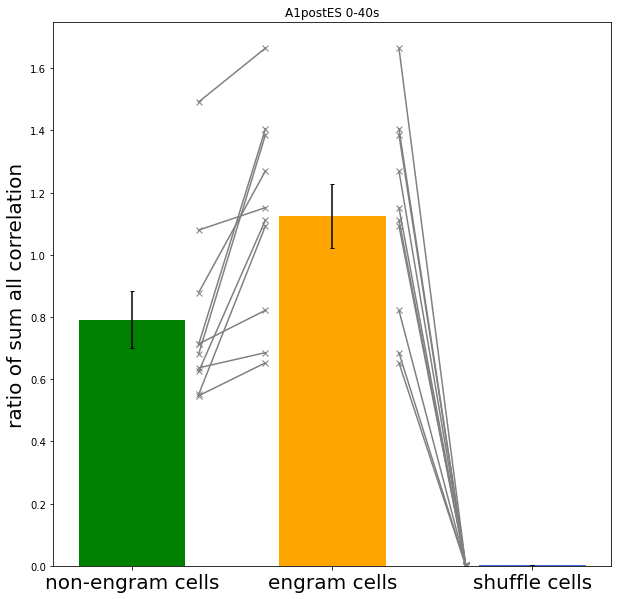

In [6]:
df = means_of_sum_correlation('A1postES', 0, 40)
ratio_of_sum_correlation(df, 'A1postES 0-40s')
df_per_context['A1postES_0-40'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.001167      0.983073          0.776031
ID181106CreB       0.001238      1.182496          0.638184
ID181106CreC       0.001159      1.246529          0.628881
ID181106CreG       0.000874      0.895727          0.546301
ID181106CreH       0.000752      0.571818          0.560454
ID181106CreI       0.001164      1.270252          1.032460
ID181106CreK       0.001692      1.222666          1.480057
ID181106CreL       0.001178      1.063624          0.574308
ID181106CreN       0.001234      1.013062          0.870444
ID181106CreQ       0.001374      1.320369          0.643299


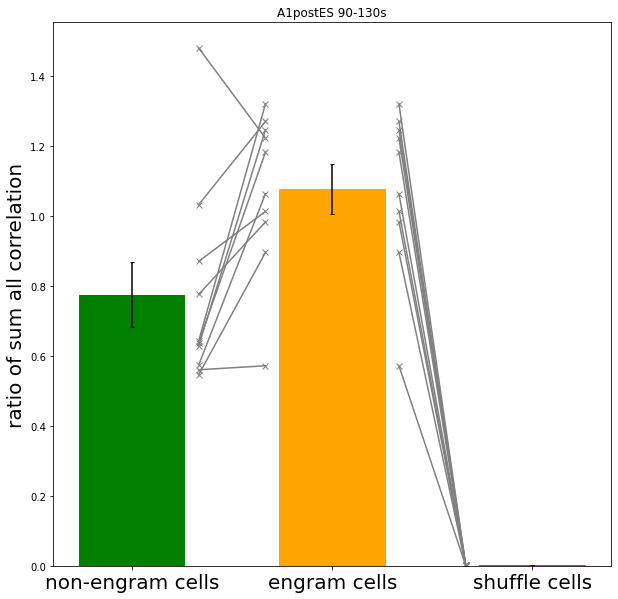

In [7]:
df = means_of_sum_correlation('A1postES', 90, 130)
ratio_of_sum_correlation(df, 'A1postES 90-130s')
df_per_context['A1postES_90-130'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.001009      0.997630          0.741007
ID181106CreB       0.001074      1.183340          0.623693
ID181106CreC       0.001445      1.740690          0.746502
ID181106CreG       0.000919      0.986605          0.700477
ID181106CreH       0.000844      0.609307          0.621368
ID181106CreI       0.000768      0.561085          0.564407
ID181106CreK       0.001364      0.987982          0.883761
ID181106CreL       0.000977      1.130132          0.533056
ID181106CreN       0.001375      1.379859          0.974529
ID181106CreQ       0.001158      1.030356          0.571704


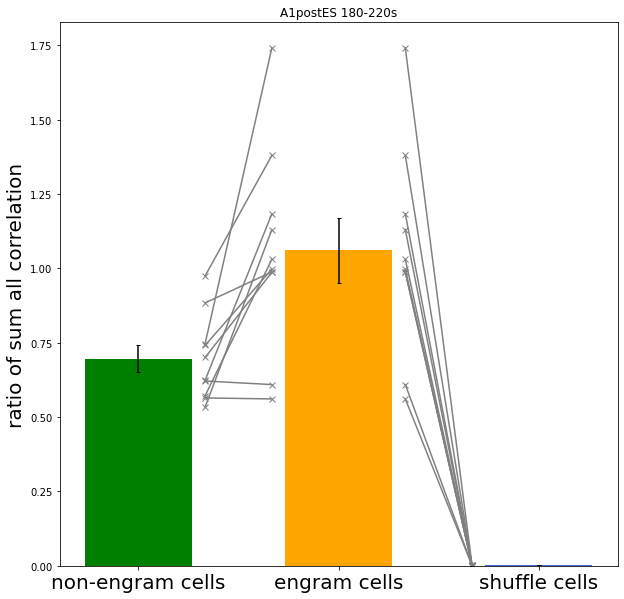

In [8]:
df = means_of_sum_correlation('A1postES', 180, 220)
ratio_of_sum_correlation(df, 'A1postES 180-220s')
df_per_context['A1postES_180-220'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.000850      0.821283          0.523777
ID181106CreB       0.001650      1.172900          0.684018
ID181106CreC       0.001795      1.418451          0.676238
ID181106CreG       0.001292      0.952355          0.981703
ID181106CreH       0.000721      0.595546          0.546330
ID181106CreI       0.000648      0.631793          0.534257
ID181106CreK       0.000983      0.867082          0.552298
ID181106CreL       0.000949      1.114095          0.602897
ID181106CreN       0.000870      0.873229          0.476200
ID181106CreQ       0.001111      1.209302          0.596713


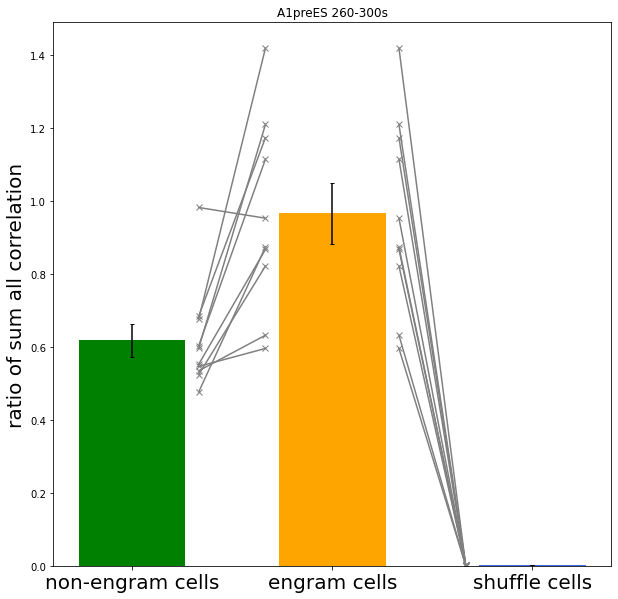

In [10]:
df = means_of_sum_correlation('A1preES', 260, 300)
ratio_of_sum_correlation(df, 'A1preES 260-300s')
df_per_context['A1preES_260-300'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.001185      1.109618          0.602081
ID181106CreB       0.001658      1.241617          0.890406
ID181106CreC       0.000915      0.853533          0.644386
ID181106CreG       0.001711      1.425255          1.088603
ID181106CreH       0.000543      0.492730          0.378446
ID181106CreI       0.000786      0.815495          0.601400
ID181106CreK       0.001076      1.026391          0.545303
ID181106CreL       0.002081      1.618492          0.795471
ID181106CreN       0.001506      1.490118          0.917314
ID181106CreQ       0.001671      1.407982          0.878091


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.000910      0.999427          0.630263
ID181106CreB       0.001172      1.400112          0.850480
ID181106CreC       0.000985      0.951066          0.595963
ID181106CreG       0.001172      0.992457          0.661652
ID181106CreH       0.000799      0.816491          0.603116
ID181106CreI       0.000955      0.870784          0.607872
ID181106CreK       0.001231      1.191044          0.767457
ID181106CreL       0.002158      2.124790          1.122873
ID181106CreN       0.001493      1.664006          0.793496
ID181106CreQ       0.001321      1.519022          0.853236


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.001158      1.032668          0.674976
ID181106CreB       0.001472      1.476313          0.946956
ID181106CreC       0.001017      0.818337          0.451423
ID181106CreG       0.001323      1.404597          1.029136
ID181106CreH       0.000676      0.751844          0.558467
ID181106CreI       0.000714      0.582181          0.440314
ID181106CreK       0.001315      1.242929          0.821788
ID181106CreL       0.001477      1.521463          0.721133
ID181106CreN       0.001119      1.149516          0.552247
ID181106CreQ       0.001907      1.649580          1.070914


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.000958      1.102473          0.639992
ID181106CreB       0.001612      1.438719          0.783653
ID181106CreC       0.000846      0.951389          0.535435
ID181106CreG       0.001762      1.157427          0.758200
ID181106CreH       0.000863      0.916380          0.704196
ID181106CreI       0.000545      0.540699          0.462695
ID181106CreK       0.001218      1.060177          0.820851
ID181106CreL       0.001435      1.454650          0.653212
ID181106CreN       0.001492      1.326158          0.737710
ID181106CreQ       0.001463      1.417463          0.949330


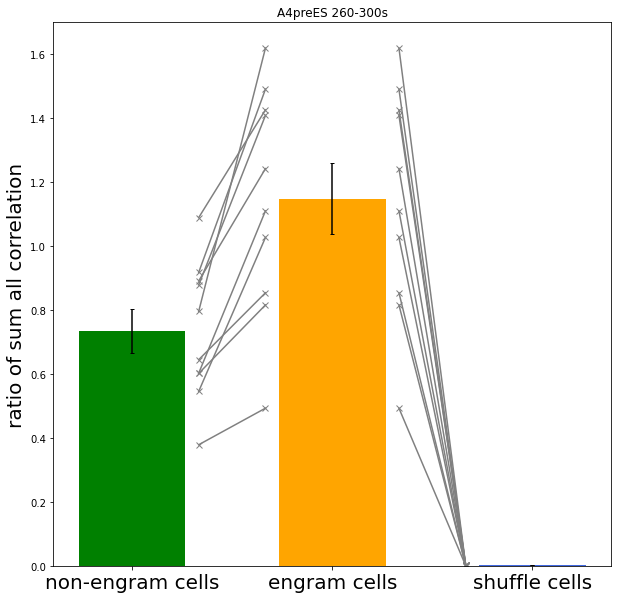

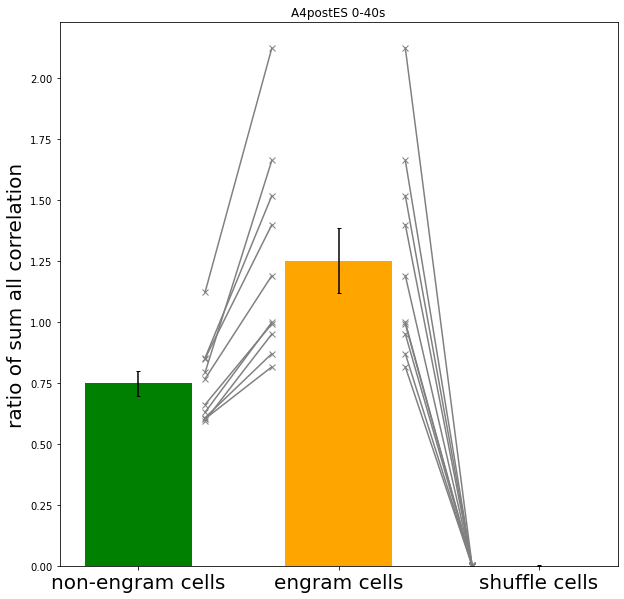

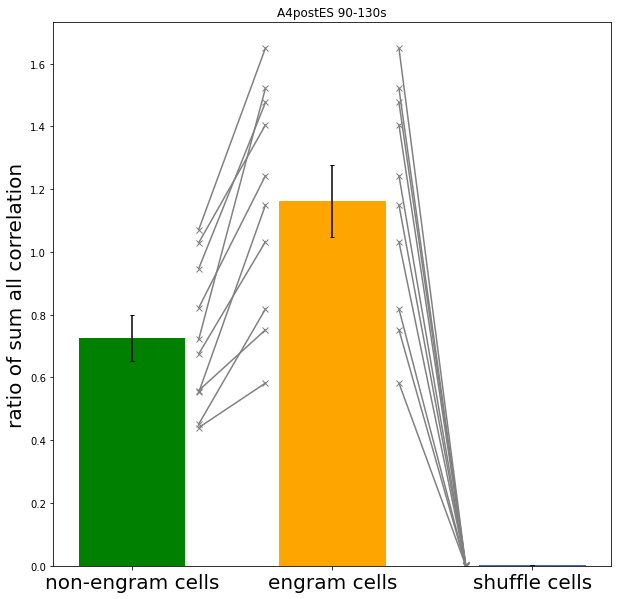

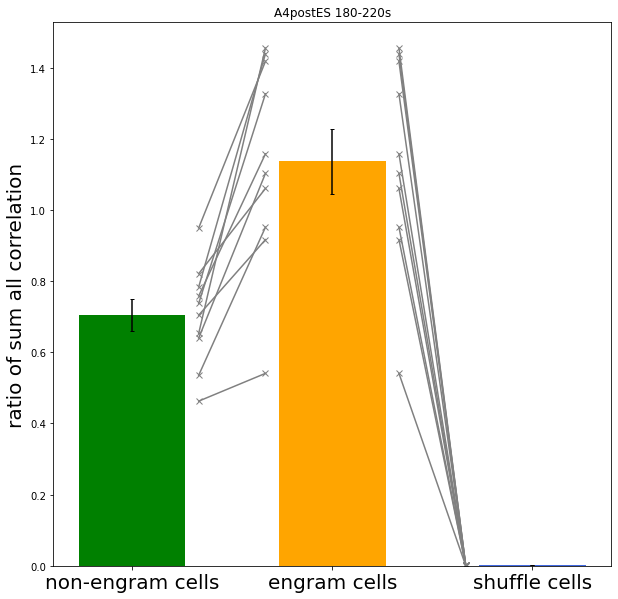

In [11]:
df = means_of_sum_correlation('A4preES', 260, 300)
ratio_of_sum_correlation(df, 'A4preES 260-300s')
df_per_context['A4preES_260-300'] = df

df = means_of_sum_correlation('A4postES', 0, 40)
ratio_of_sum_correlation(df, 'A4postES 0-40s')
df_per_context['A4postES_0-40'] = df

df = means_of_sum_correlation('A4postES', 90, 130)
ratio_of_sum_correlation(df, 'A4postES 90-130s')
df_per_context['A4postES_90-130'] = df

df = means_of_sum_correlation('A4postES', 180, 220)
ratio_of_sum_correlation(df, 'A4postES 180-220s')
df_per_context['A4postES_180-220'] = df

In [12]:
df_per_context

{'A1postES_0-40':               shuffle cells  engram cells  non-engram cells
 ID181106CreA       0.000976      0.821455          0.713295
 ID181106CreB       0.001584      1.269498          0.878529
 ID181106CreC       0.001245      1.092691          0.551311
 ID181106CreG       0.001434      1.151453          1.079229
 ID181106CreH       0.000790      0.685231          0.636393
 ID181106CreI       0.000734      0.652584          0.546805
 ID181106CreK       0.002035      1.664313          1.491221
 ID181106CreL       0.001380      1.404816          0.712451
 ID181106CreN       0.000850      1.111623          0.624705
 ID181106CreQ       0.001465      1.385771          0.681129,
 'A1postES_90-130':               shuffle cells  engram cells  non-engram cells
 ID181106CreA       0.001167      0.983073          0.776031
 ID181106CreB       0.001238      1.182496          0.638184
 ID181106CreC       0.001159      1.246529          0.628881
 ID181106CreG       0.000874      0.895727      

In [28]:
df = df_per_context['A1preES_260-300']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A1preES_260-300: p = %f' % pvalue)

df = df_per_context['A1postES_0-40']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A1postES_0-40: p = %f' % pvalue)

df = df_per_context['A1postES_90-130']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A1postES_90-130: p = %f' % pvalue)

df = df_per_context['A1postES_180-220']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A1postES_180-220: p = %f' % pvalue)

df = df_per_context['A4preES_260-300']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A4preES_260-300: p = %f' % pvalue)

df = df_per_context['A4postES_0-40']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A4postES_0-40: p = %f' % pvalue)

df = df_per_context['A4postES_90-130']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A4postES_90-130: p = %f' % pvalue)

df = df_per_context['A4postES_180-220']
_, pvalue = ttest_ind(df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'], equal_var=False)
print('A4postES_180-220: p = %f' % pvalue)

A1preES_260-300: p = 0.002454
A1postES_0-40: p = 0.028198
A1postES_90-130: p = 0.019301
A1postES_180-220: p = 0.009007
A4preES_260-300: p = 0.006612
A4postES_0-40: p = 0.004253
A4postES_90-130: p = 0.005637
A4postES_180-220: p = 0.000944


In [126]:
df_index = const.ANIMAL_NAMES
df_columns = ['A1preES_260-300', 'A1postES_0-40', 'A1postES_90-130', 'A1postES_180-220', 'A4preES_260-300', 'A4postES_0-40', 'A4postES_90-130', 'A4postES_180-220']

engram_df = pd.DataFrame(index=df_index, columns=df_columns)
for key, df_value in df_per_context.items():
    engram_df.loc[:, key] = df_value.loc[:, 'engram cells']
    
print(engram_df)
#engram_df.to_csv('./sum_correlation_for_engram.csv')

non_engram_df = pd.DataFrame(index=df_index, columns=df_columns)
for key, df_value in df_per_context.items():
    non_engram_df.loc[:, key] = df_value.loc[:, 'non-engram cells']
    
print(non_engram_df)
#non_engram_df.to_csv('./sum_correlation_for_non_engram.csv')

shuffle_df = pd.DataFrame(index=df_index, columns=df_columns)
for key, df_value in df_per_context.items():
    shuffle_df.loc[:, key] = df_value.loc[:, 'shuffle cells']
    
print(shuffle_df)
#shuffle_df.to_csv('./sum_correlation_for_shuffle.csv')

              A1preES_260-300  A1postES_0-40  A1postES_90-130  \
ID181106CreA         0.821283       0.821455         0.983073   
ID181106CreB         1.172900       1.269498         1.182496   
ID181106CreC         1.418451       1.092691         1.246529   
ID181106CreG         0.952355       1.151453         0.895727   
ID181106CreH         0.595546       0.685231         0.571818   
ID181106CreI         0.631793       0.652584         1.270252   
ID181106CreK         0.867082       1.664313         1.222666   
ID181106CreL         1.114095       1.404816         1.063624   
ID181106CreN         0.873229       1.111623         1.013062   
ID181106CreQ         1.209302       1.385771         1.320369   

              A1postES_180-220  A4preES_260-300  A4postES_0-40  \
ID181106CreA          0.997630         1.109618       0.999427   
ID181106CreB          1.183340         1.241617       1.400112   
ID181106CreC          1.740690         0.853533       0.951066   
ID181106CreG        

<ipython-input-142-87f3bc1569a3>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')


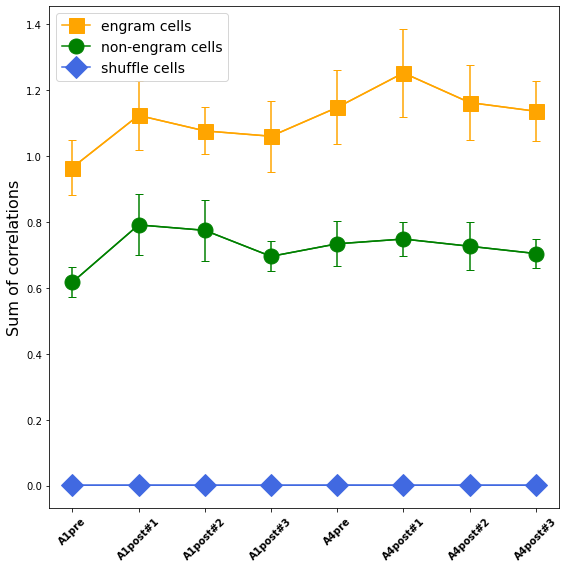

In [142]:
engram_mean = engram_df.mean()
engram_sem = engram_df.sem()
non_engram_mean = non_engram_df.mean()
non_engram_sem = non_engram_df.sem()
shuffle_mean = shuffle_df.mean()
shuffle_sem = shuffle_df.sem()

fig, ax = plt.subplots(1, figsize=(8, 8), tight_layout=True)

yticks = list(np.arange(0.0, 1.5, 0.10))
ax.errorbar(df_columns, engram_mean, yerr=engram_sem, capsize=4, color='orange')
ax.plot(df_columns, engram_mean, marker='s', markersize=15, label='engram cells', color='orange')

ax.errorbar(df_columns, non_engram_mean, yerr=non_engram_sem, capsize=4, color='green')
ax.plot(df_columns, non_engram_mean, marker='o', markersize=15, label='non-engram cells', color='green')

ax.errorbar(df_columns, shuffle_mean, yerr=shuffle_sem, capsize=4, color='royalblue')
ax.plot(df_columns, shuffle_mean, marker='D', markersize=15, label='shuffle cells', color='royalblue')

ax.set_xticklabels(['A1pre', 'A1post#1', 'A1post#2', 'A1post#3', 'A4pre', 'A4post#1', 'A4post#2', 'A4post#3'], rotation=45, fontweight='bold')
ax.set_ylabel('Sum of correlations', fontsize=16)
ax.legend(fontsize=14)
fig.show()

In [148]:
_, pvalue = wilcoxon(engram_df.loc[:, 'A1preES_260-300'], engram_df.loc[:, 'A1postES_0-40'])
pvalue

0.064453125